In [1]:
from data_functions import *

In [3]:
SBER = pd.read_csv('./Data/Russia - Sberbank Rossii PAO (SBER).csv')
SBER

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 31, 2021",291.02,294,294.42,290.26,47.00M,-0.76%
1,"Mar 30, 2021",293.25,294.86,295.72,291.5,38.81M,-0.02%
2,"Mar 29, 2021",293.3,289.72,294.09,289.26,43.68M,0.71%
3,"Mar 26, 2021",291.22,288.63,292.75,288.32,56.07M,1.59%
4,"Mar 25, 2021",286.66,286.5,287.03,283.85,35.22M,0.30%
...,...,...,...,...,...,...,...
307,"Jan 09, 2020",257.99,259.4,261.76,257.01,38.33M,-0.45%
308,"Jan 08, 2020",259.15,253.57,259.15,253.03,40.82M,2.07%
309,"Jan 06, 2020",253.9,254.75,254.84,251.4,22.35M,-0.43%
310,"Jan 03, 2020",255,255.99,258.19,253.7,35.85M,0.10%


In [4]:
SBER.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      312 non-null    object
 1   Price     312 non-null    object
 2   Open      312 non-null    object
 3   High      312 non-null    object
 4   Low       312 non-null    object
 5   Vol.      311 non-null    object
 6   Change %  311 non-null    object
dtypes: object(7)
memory usage: 17.2+ KB


In [5]:
## drop last row because it doesn't contain relevant information

SBER.drop(311, inplace=True)

In [6]:
## change date column to datetime

SBER['Date'] = pd.to_datetime(SBER['Date'], format='%b %d, %Y')

In [7]:
## change price columns to integer

SBER['Price'] = SBER['Price'].astype(float)
SBER['Open'] = SBER['Open'].astype(float)
SBER['High'] = SBER['High'].astype(float)
SBER['Low'] = SBER['Low'].astype(float)

In [8]:
SBER.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      311 non-null    datetime64[ns]
 1   Price     311 non-null    float64       
 2   Open      311 non-null    float64       
 3   High      311 non-null    float64       
 4   Low       311 non-null    float64       
 5   Vol.      311 non-null    object        
 6   Change %  311 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 19.4+ KB


In [9]:
SBER.sort_values(['Date'], ascending=True, ignore_index=True, inplace=True)
SBER

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-03,255.00,255.99,258.19,253.70,35.85M,0.10%
1,2020-01-06,253.90,254.75,254.84,251.40,22.35M,-0.43%
2,2020-01-08,259.15,253.57,259.15,253.03,40.82M,2.07%
3,2020-01-09,257.99,259.40,261.76,257.01,38.33M,-0.45%
4,2020-01-10,258.19,257.86,259.25,256.88,18.85M,0.08%
...,...,...,...,...,...,...,...
306,2021-03-25,286.66,286.50,287.03,283.85,35.22M,0.30%
307,2021-03-26,291.22,288.63,292.75,288.32,56.07M,1.59%
308,2021-03-29,293.30,289.72,294.09,289.26,43.68M,0.71%
309,2021-03-30,293.25,294.86,295.72,291.50,38.81M,-0.02%


In [10]:
## find rows for 2021 data

SBER.loc[SBER['Date'] > '2020-12-31']

,Date,Price,Open,High,Low,Vol.,Change %
250,2021-01-04,272.00,274.67,276.60,270.61,48.92M,0.13%
251,2021-01-05,275.20,272.69,275.70,270.28,45.58M,1.18%
252,2021-01-06,272.93,275.94,275.94,271.62,40.95M,-0.82%
253,2021-01-08,283.64,275.11,283.99,275.11,88.93M,3.92%
254,2021-01-11,289.49,282.86,292.95,279.48,112.35M,2.06%
...,...,...,...,...,...,...,...
306,2021-03-25,286.66,286.50,287.03,283.85,35.22M,0.30%
307,2021-03-26,291.22,288.63,292.75,288.32,56.07M,1.59%
308,2021-03-29,293.30,289.72,294.09,289.26,43.68M,0.71%
309,2021-03-30,293.25,294.86,295.72,291.50,38.81M,-0.02%


In [41]:
SBER.drop(250, inplace=True)

In [42]:
## split training data and testing data, testing data will be the year of 2021

training_data = SBER[['Date', 'Price']][:250]
testing_data = SBER[['Date', 'Price']][250:]

In [43]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(SBER[['Price']])
scaled_train_data = scaled_data[:250]

In [44]:
len(training_data)

250

In [45]:
len(testing_data)

60

# PyTorch
## Daily

In [46]:
X_train, y_train = get_train_data(scaled_train_data, 14)
X_test, y_test = get_test_data(SBER, testing_data, scaler, 14)

In [47]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [48]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=1, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


In [49]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train)    
    
    loss = criterion(y_train_pred, y_train)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.1881668120622635
Epoch  1 MSE:  0.05880045145750046
Epoch  2 MSE:  0.13330882787704468
Epoch  3 MSE:  0.04429662972688675
Epoch  4 MSE:  0.0509614460170269
Epoch  5 MSE:  0.06372420489788055
Epoch  6 MSE:  0.06797316670417786
Epoch  7 MSE:  0.06507965922355652
Epoch  8 MSE:  0.057979051023721695
Epoch  9 MSE:  0.049203045666217804
Epoch  10 MSE:  0.041321638971567154
Epoch  11 MSE:  0.037691786885261536
Epoch  12 MSE:  0.041527729481458664
Epoch  13 MSE:  0.046795040369033813
Epoch  14 MSE:  0.043086010962724686
Epoch  15 MSE:  0.036628302186727524
Epoch  16 MSE:  0.03332699090242386
Epoch  17 MSE:  0.03287060931324959
Epoch  18 MSE:  0.03325638547539711
Epoch  19 MSE:  0.03281004726886749
Epoch  20 MSE:  0.030325286090373993
Epoch  21 MSE:  0.024911731481552124
Epoch  22 MSE:  0.016865894198417664
Epoch  23 MSE:  0.01728048175573349
Epoch  24 MSE:  0.01626310683786869
Epoch  25 MSE:  0.01001068763434887
Epoch  26 MSE:  0.0139034204185009
Epoch  27 MSE:  0.014781157486

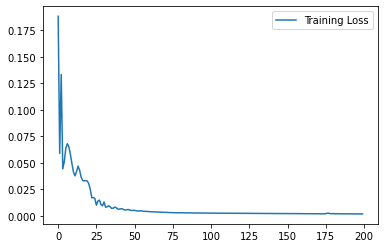

In [50]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [51]:
y_train_pred = model(X_train)
y_test_pred = model(X_test)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 5.00 RMSE
Test Score: 4.39 RMSE


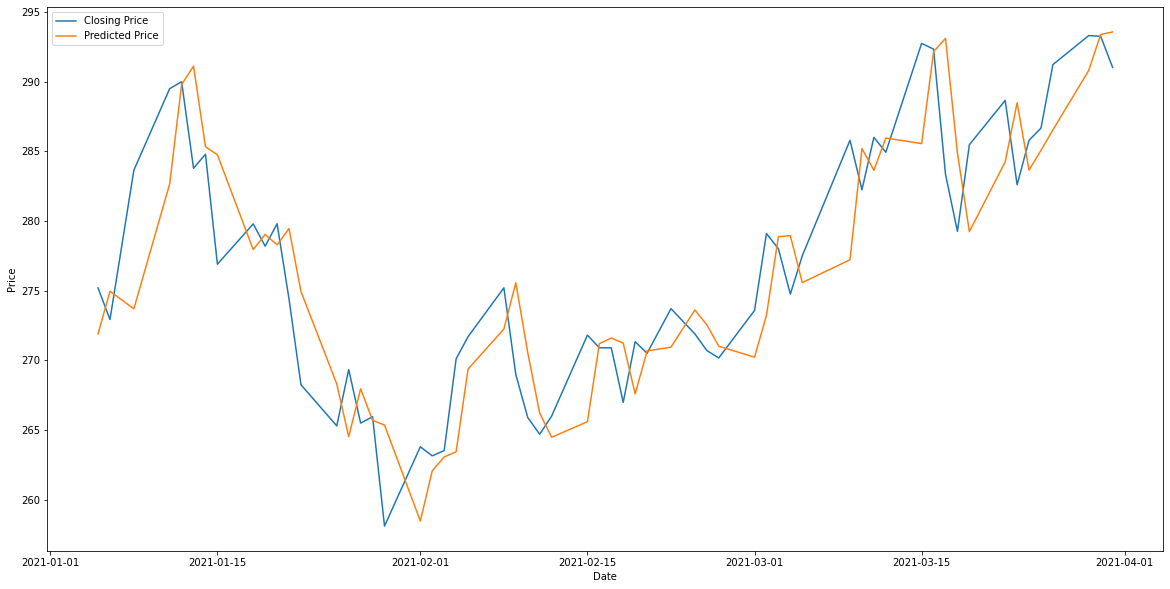

In [52]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test, label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [53]:
boll_daily = SBER[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_daily['Price'] = price
boll_daily['SMA'] = sma(boll_daily['Price'], 9)
boll_daily['upper_bb'], boll_daily['lower_bb'] = bollinger(boll_daily['Price'], boll_daily['SMA'], 9)
boll_daily

C:\Users\Chris\AppData\Local\Temp/ipykernel_6456/507980337.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_6456/507980337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['SMA'] = sma(boll_daily['Price'], 9)
C:\Users\Chris\AppData\Local\Temp/ipykernel_6456/507980337.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-03,255.000000,NaN,NaN,NaN
1,2020-01-06,253.900000,NaN,NaN,NaN
2,2020-01-08,259.150000,NaN,NaN,NaN
3,2020-01-09,257.990000,NaN,NaN,NaN
4,2020-01-10,258.190000,NaN,NaN,NaN
...,...,...,...,...,...
306,2021-03-25,285.069031,286.259935,294.932129,277.587742
307,2021-03-26,286.535828,286.369307,295.026108,277.712505
308,2021-03-29,290.798523,286.220211,294.466211,277.974212
309,2021-03-30,293.380890,286.251475,294.616124,277.886827


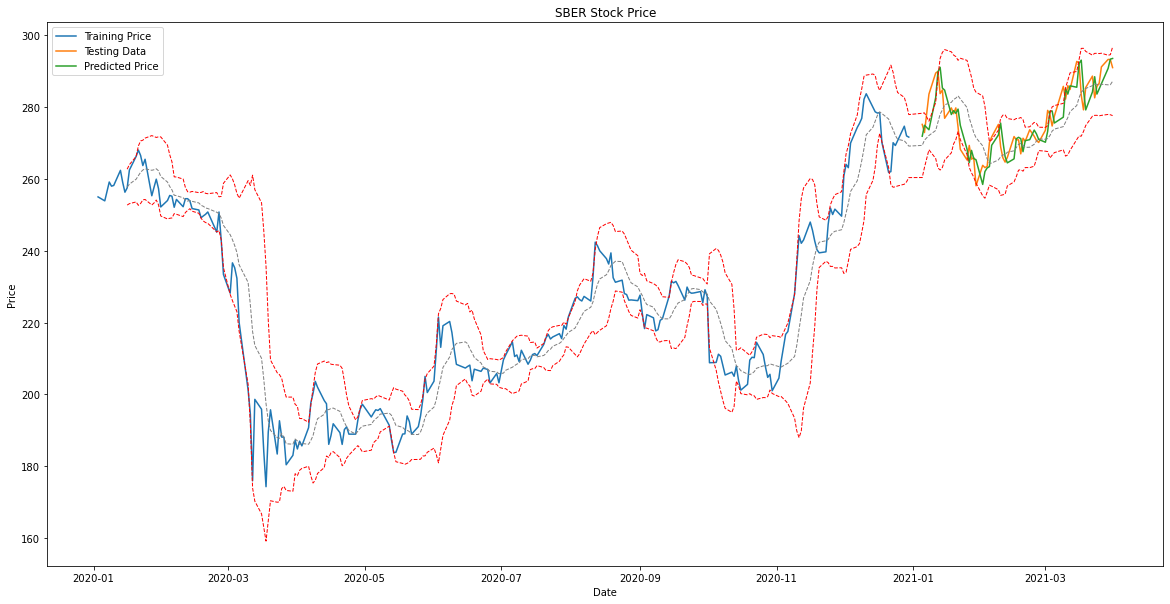

In [54]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'], boll_daily['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SBER Stock Price')
plt.legend()
plt.show()

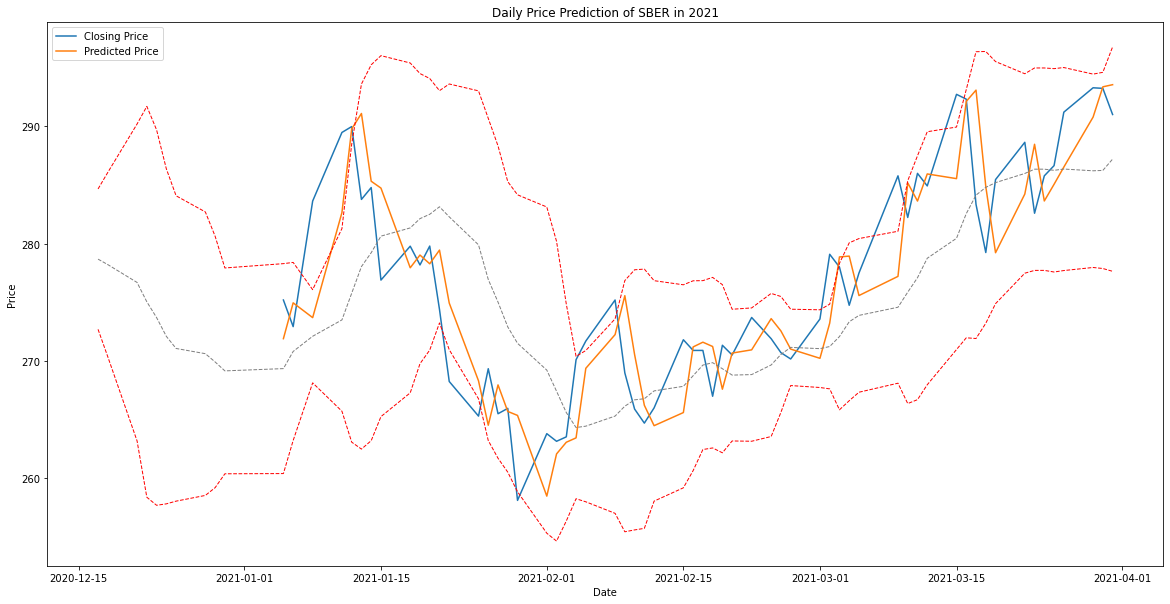

In [55]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'][240:], boll_daily['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][240:], boll_daily['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][240:], boll_daily['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Price Prediction of SBER in 2021')
plt.legend()
plt.show()

## Weekly

In [56]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=5, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=5, bias=True)
)


In [57]:
X_train_w, y_train_w = get_weekly_train_data(scaled_train_data, 15)
X_test_w, y_test_w = get_weekly_test_data(SBER, testing_data, scaler, 15)

In [58]:
X_train_w = torch.from_numpy(X_train_w).type(torch.Tensor)
X_test_w = torch.from_numpy(X_test_w).type(torch.Tensor)
y_train_w = torch.from_numpy(y_train_w).type(torch.Tensor)
y_test_w = torch.from_numpy(y_test_w).type(torch.Tensor)

In [59]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_w)    
    
    loss = criterion(y_train_pred, y_train_w)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.19162002205848694
Epoch  1 MSE:  0.11782833933830261
Epoch  2 MSE:  0.05158207565546036
Epoch  3 MSE:  0.2340949922800064
Epoch  4 MSE:  0.04691328853368759
Epoch  5 MSE:  0.05813564360141754
Epoch  6 MSE:  0.07721958309412003
Epoch  7 MSE:  0.08437730371952057
Epoch  8 MSE:  0.08370497822761536
Epoch  9 MSE:  0.07848183810710907
Epoch  10 MSE:  0.07065229117870331
Epoch  11 MSE:  0.061592910438776016
Epoch  12 MSE:  0.05273577198386192
Epoch  13 MSE:  0.046046413481235504
Epoch  14 MSE:  0.04405417665839195
Epoch  15 MSE:  0.04765317216515541
Epoch  16 MSE:  0.0517326258122921
Epoch  17 MSE:  0.05155384913086891
Epoch  18 MSE:  0.04821460694074631
Epoch  19 MSE:  0.04465111345052719
Epoch  20 MSE:  0.04246874153614044
Epoch  21 MSE:  0.041722849011421204
Epoch  22 MSE:  0.04182424023747444
Epoch  23 MSE:  0.042165711522102356
Epoch  24 MSE:  0.04231556877493858
Epoch  25 MSE:  0.04201602563261986
Epoch  26 MSE:  0.0411360077559948
Epoch  27 MSE:  0.03962666913866997
E

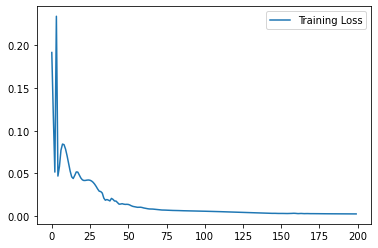

In [60]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [61]:
y_train_pred = model(X_train_w)
y_test_pred = model(X_test_w)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_w.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_w.reshape(12, 5).detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_w[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_w[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 222.76 RMSE
Test Score: 274.30 RMSE


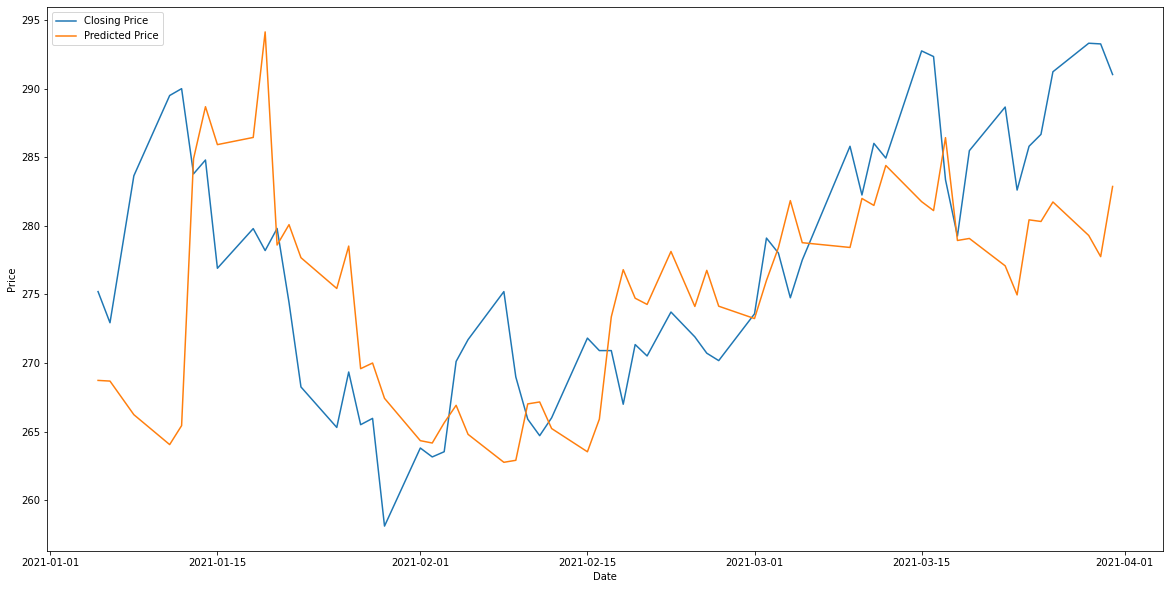

In [62]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [63]:
boll_weekly = SBER[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_weekly['Price'] = price
boll_weekly['SMA'] = sma(boll_weekly['Price'], 10)
boll_weekly['upper_bb'], boll_weekly['lower_bb'] = bollinger(boll_weekly['Price'], boll_weekly['SMA'], 10)
boll_weekly

C:\Users\Chris\AppData\Local\Temp/ipykernel_6456/812793731.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_6456/812793731.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['SMA'] = sma(boll_weekly['Price'], 10)
C:\Users\Chris\AppData\Local\Temp/ipykernel_6456/812793731.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-03,255.000000,NaN,NaN,NaN
1,2020-01-06,253.900000,NaN,NaN,NaN
2,2020-01-08,259.150000,NaN,NaN,NaN
3,2020-01-09,257.990000,NaN,NaN,NaN
4,2020-01-10,258.190000,NaN,NaN,NaN
...,...,...,...,...,...
306,2021-03-25,280.309906,280.443930,287.078573,273.809287
307,2021-03-26,281.731049,280.178107,286.303676,274.052537
308,2021-03-29,279.289551,279.931653,285.973149,273.890157
309,2021-03-30,277.747070,279.596011,285.720531,273.471491


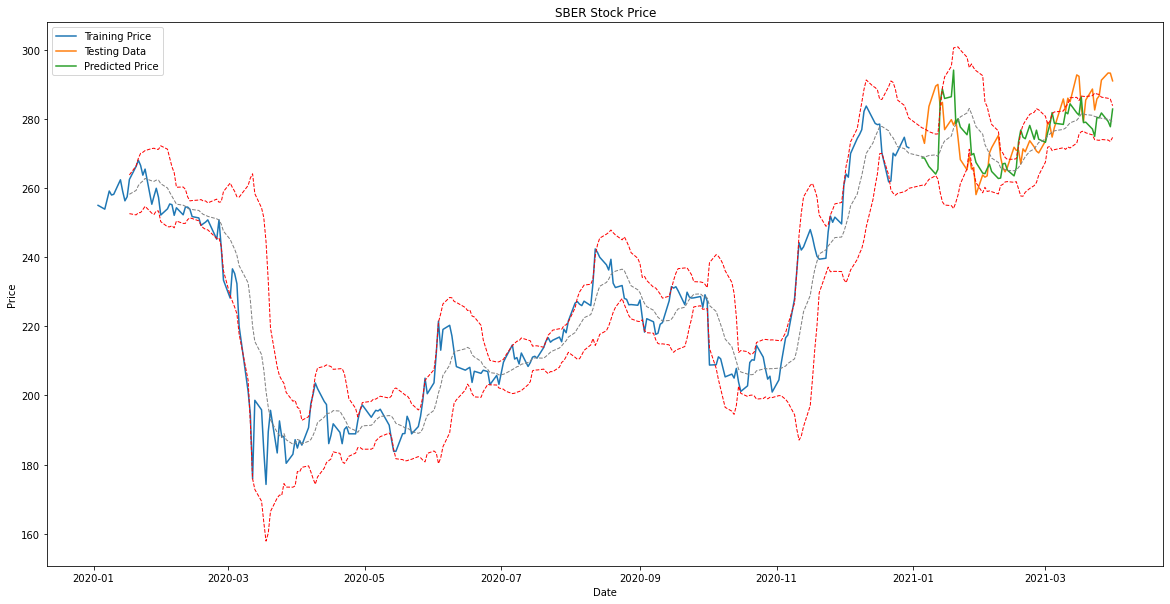

In [64]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'], boll_weekly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SBER Stock Price')
plt.legend()
plt.show()

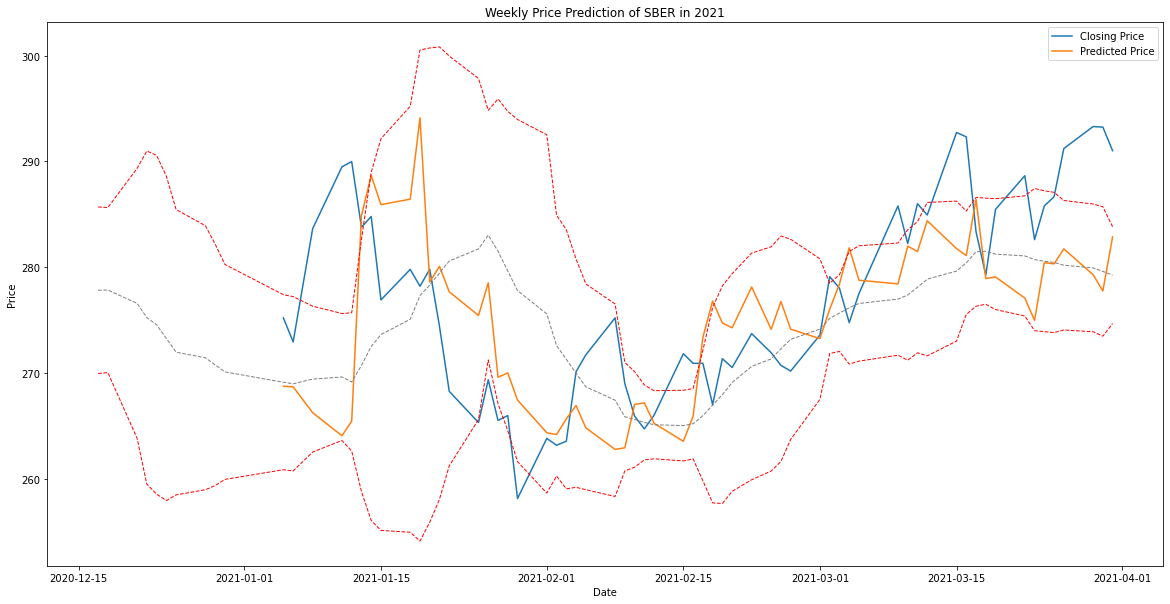

In [65]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'][240:], boll_weekly['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][240:], boll_weekly['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][240:], boll_weekly['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Weekly Price Prediction of SBER in 2021')
plt.legend()
plt.show()

# Monthly

In [66]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=20, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=20, bias=True)
)


In [68]:
X_train_m, y_train_m = get_monthly_train_data(scaled_train_data, 30)
X_test_m, y_test_m = get_monthly_test_data(SBER, testing_data, scaler, 30)

In [69]:
X_train_m = torch.from_numpy(X_train_m).type(torch.Tensor)
X_test_m = torch.from_numpy(X_test_m).type(torch.Tensor)
y_train_m = torch.from_numpy(y_train_m).type(torch.Tensor)
y_test_m = torch.from_numpy(y_test_m).type(torch.Tensor)

In [70]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_m)    
    
    loss = criterion(y_train_pred, y_train_m)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.1846616268157959
Epoch  1 MSE:  0.13868030905723572
Epoch  2 MSE:  0.07879181951284409
Epoch  3 MSE:  0.15185405313968658
Epoch  4 MSE:  0.05070076882839203
Epoch  5 MSE:  0.05424003675580025
Epoch  6 MSE:  0.06366272270679474
Epoch  7 MSE:  0.06312024593353271
Epoch  8 MSE:  0.05820563808083534
Epoch  9 MSE:  0.05339766666293144
Epoch  10 MSE:  0.0507146418094635
Epoch  11 MSE:  0.04987483471632004
Epoch  12 MSE:  0.04946067929267883
Epoch  13 MSE:  0.04847409948706627
Epoch  14 MSE:  0.04699838533997536
Epoch  15 MSE:  0.04566846042871475
Epoch  16 MSE:  0.044906727969646454
Epoch  17 MSE:  0.044674843549728394
Epoch  18 MSE:  0.04468108341097832
Epoch  19 MSE:  0.044642429798841476
Epoch  20 MSE:  0.04440665990114212
Epoch  21 MSE:  0.04396030306816101
Epoch  22 MSE:  0.043386124074459076
Epoch  23 MSE:  0.0428055077791214
Epoch  24 MSE:  0.042321283370256424
Epoch  25 MSE:  0.0419718436896801
Epoch  26 MSE:  0.041709642857313156
Epoch  27 MSE:  0.04141433164477348


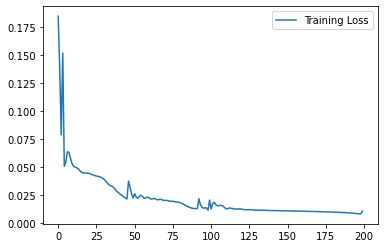

In [71]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [72]:
y_train_pred = model(X_train_m)
y_test_pred = model(X_test_m)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_m.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_m.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_m[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_m[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 215.26 RMSE
Test Score: 253.35 RMSE


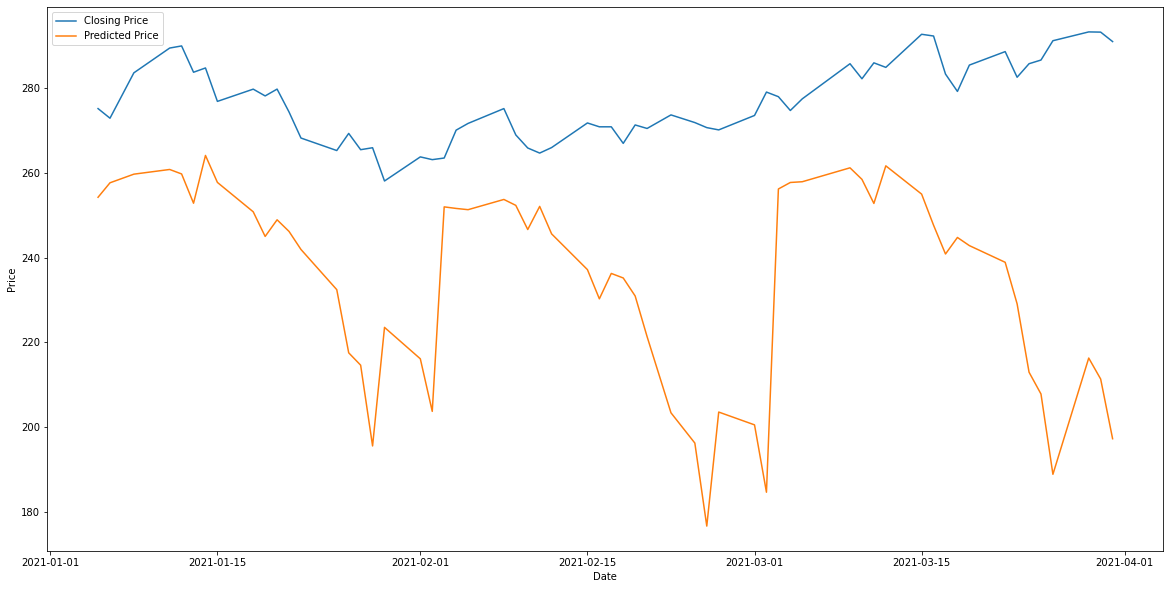

In [73]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [74]:
boll_monthly = SBER[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_monthly['Price'] = price
boll_monthly['SMA'] = sma(boll_monthly['Price'], 10)
boll_monthly['upper_bb'], boll_monthly['lower_bb'] = bollinger(boll_monthly['Price'], boll_monthly['SMA'], 10)
boll_monthly

C:\Users\Chris\AppData\Local\Temp/ipykernel_6456/1391429709.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_monthly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_6456/1391429709.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_monthly['SMA'] = sma(boll_monthly['Price'], 10)
C:\Users\Chris\AppData\Local\Temp/ipykernel_6456/1391429709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-03,255.000000,NaN,NaN,NaN
1,2020-01-06,253.900000,NaN,NaN,NaN
2,2020-01-08,259.150000,NaN,NaN,NaN
3,2020-01-09,257.990000,NaN,NaN,NaN
4,2020-01-10,258.190000,NaN,NaN,NaN
...,...,...,...,...,...
306,2021-03-25,207.832230,238.172968,272.412335,203.933600
307,2021-03-26,188.877197,230.892160,272.976177,188.808143
308,2021-03-29,216.319351,227.022708,266.269383,187.776033
309,2021-03-30,211.362183,223.391600,260.823823,185.959377


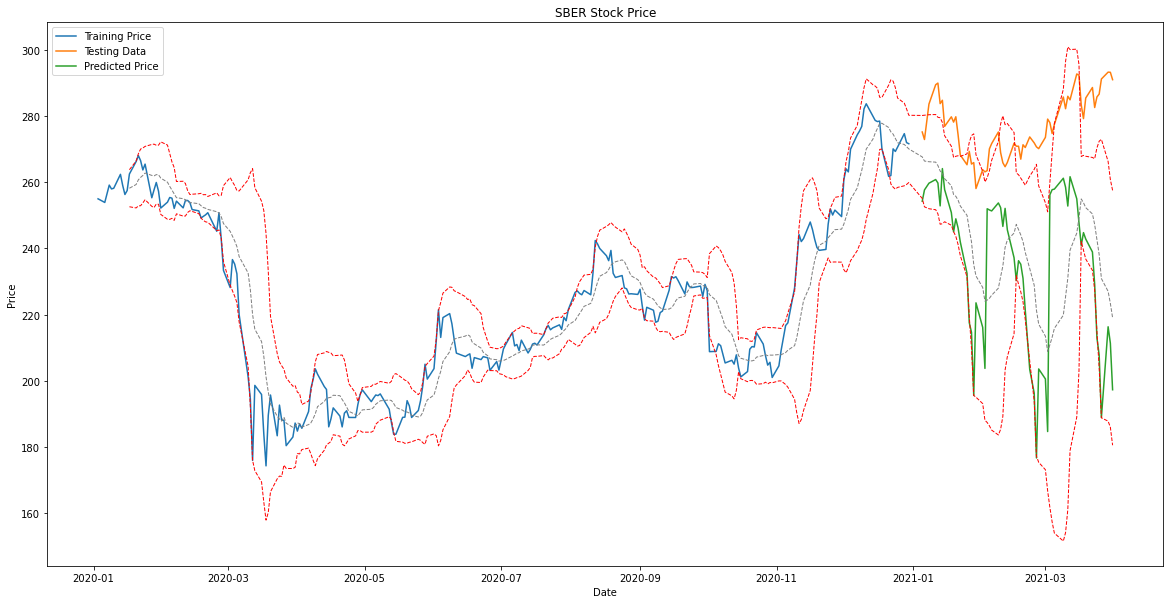

In [75]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'], boll_monthly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SBER Stock Price')
plt.legend()
plt.show()

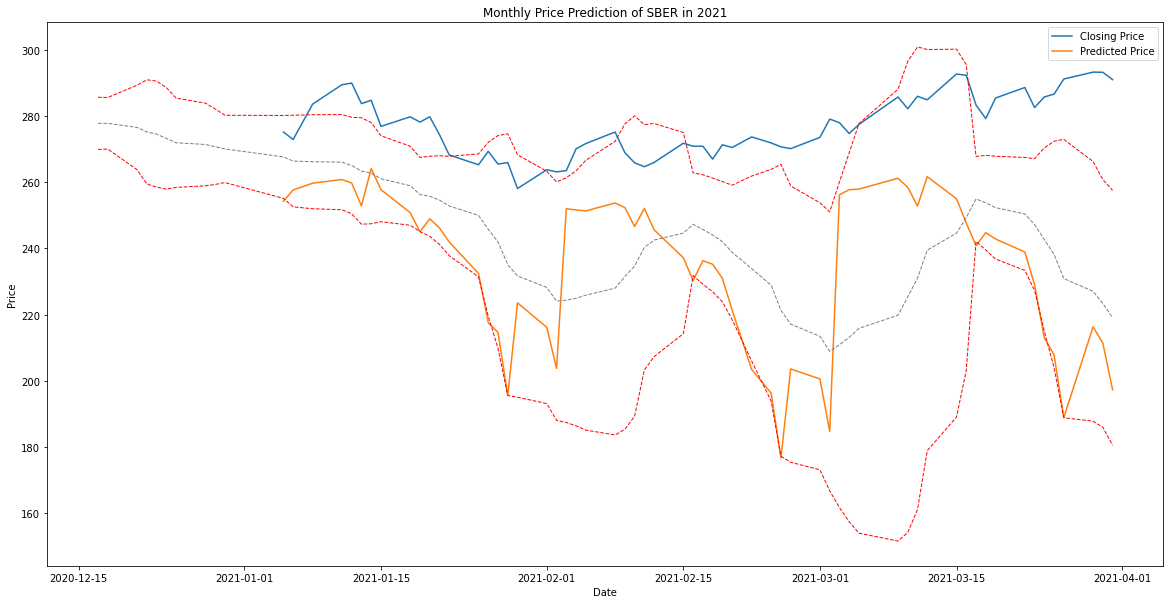

In [76]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'][240:], boll_monthly['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][240:], boll_monthly['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][240:], boll_monthly['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monthly Price Prediction of SBER in 2021')
plt.legend()
plt.show()